In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from glob import glob

from config import *
from binance.client import Client
from BinanceFuturesPy.futurespy import Client as cf
from warnings import filterwarnings
filterwarnings('ignore')

client = Client(api_key, api_secret)
clientf = cf(api_key, api_secret)# , testnet=True)

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
csv = glob("*BTC*.c*")
csv

['data_book_BTC_27_09_2021_17_01_12.csv']

In [328]:
client.KLINE_INTERVAL_12HOUR

'12h'

In [329]:
W = {
    1:client.KLINE_INTERVAL_1MINUTE,
    3:client.KLINE_INTERVAL_3MINUTE,
    5:client.KLINE_INTERVAL_5MINUTE,
    15:client.KLINE_INTERVAL_15MINUTE,
    30:client.KLINE_INTERVAL_30MINUTE,
    60:client.KLINE_INTERVAL_1HOUR,
    120:client.KLINE_INTERVAL_2HOUR,
    240:client.KLINE_INTERVAL_4HOUR,
    360:client.KLINE_INTERVAL_6HOUR,
    480:client.KLINE_INTERVAL_8HOUR,
    720:client.KLINE_INTERVAL_12HOUR
}

In [296]:
ee = csv[-1]
elec = ee.split("_")[2]
# elec
df = pd.read_csv(ee, sep="|", low_memory=False, parse_dates=[0], index_col=0)
df.index = pd.DatetimeIndex(pd.to_datetime(df.index, unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
# df = df.dropna()
print(ee)
df

data_book_BTC_27_09_2021_17_01_12.csv


,volb_10,vola_10,bk_10,ak_10,volb_500,vola_500,bk_500,ak_500
dtimes,,,,,,,,
2021-09-27 17:01:13.217000-05:00,352946984.4,90907153.7,8204.0,2113.0,7.082353e+09,5.469315e+09,164936.0,126845.0
2021-09-27 17:01:14.032000-05:00,688402542.4,18115408.0,15999.0,421.0,7.688524e+09,5.834167e+09,178972.0,135294.0
2021-09-27 17:01:15.042000-05:00,784771290.5,12567935.8,18235.0,292.0,6.825839e+09,6.690742e+09,158904.0,155021.0
2021-09-27 17:01:15.854000-05:00,730574239.7,55275507.7,16971.0,1284.0,6.738969e+09,7.500121e+09,156865.0,173682.0
2021-09-27 17:01:17.080000-05:00,607107466.4,84781503.3,14100.0,1969.0,6.565302e+09,7.698622e+09,152789.0,178232.0
...,...,...,...,...,...,...,...,...
2021-09-28 18:16:50.627000-05:00,319414972.8,260391737.4,7705.0,6281.0,7.009321e+09,5.352619e+09,169473.0,128848.0
2021-09-28 18:16:51.006000-05:00,319414972.8,269554359.7,7705.0,6502.0,7.049286e+09,5.403716e+09,170443.0,130080.0
2021-09-28 18:16:51.372000-05:00,412359498.5,190828016.4,9947.0,4603.0,7.138713e+09,5.187145e+09,172600.0,124860.0


In [332]:
#nan values
df.isna().sum().to_numpy().sum()

0

In [320]:
n = 60
L3m = client.futures_historical_klines(symbol=f'{elec}USDT',
                      interval=W[n],
                      # interval=f"{n}m",
                      start_str=str(df.index[0]),
                      end_str=str(df.index[-1])
                                      )
print(len(L3m))
arr = np.array(L3m, dtype=np.float)
index = pd.DatetimeIndex(pd.to_datetime(arr[:, 0], unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
df_serie = pd.DataFrame(arr[:, 3], index=index)

25


In [321]:
cs = np.array(df.columns).reshape(-1, 4)
sp = int(eval(f"60*{n}"))
data_10 = df[cs[0]].resample(f"{sp}s").sum()
data_500 = df[cs[1]].resample(f"{sp}s").sum()
data_tuple = data_10.shape[0], data_500.shape[0]
print("shape data <10, 500>:", data_tuple)
dw = pd.concat([df_serie, data_10, data_500], axis=1)
dw = dw.iloc[:-1]
dw.index = pd.to_datetime(dw.index, format = '%m/%d/%Y %H:%M:%S').strftime('%m-%d %H:%M')
print("shape klines:", dw.shape)

shape data <10, 500>: (26, 26)
shape klines: (25, 9)


In [315]:
# plt.figure(figsize=(15, 6))
# dw.iloc[400:600][0].plot()
# plt.grid()

In [307]:
# plt.figure(figsize=(15, 6))
# dw.iloc[133:200][0].plot()
# plt.grid()

In [308]:
# plt.figure(figsize=(15, 6))
# dw.iloc[80:120][0].plot()
# plt.grid()

In [309]:
# plt.figure(figsize=(15, 6))
# dw.iloc[80:120][0].plot()
# plt.grid()

In [310]:
# dw = dw.iloc[26:40]

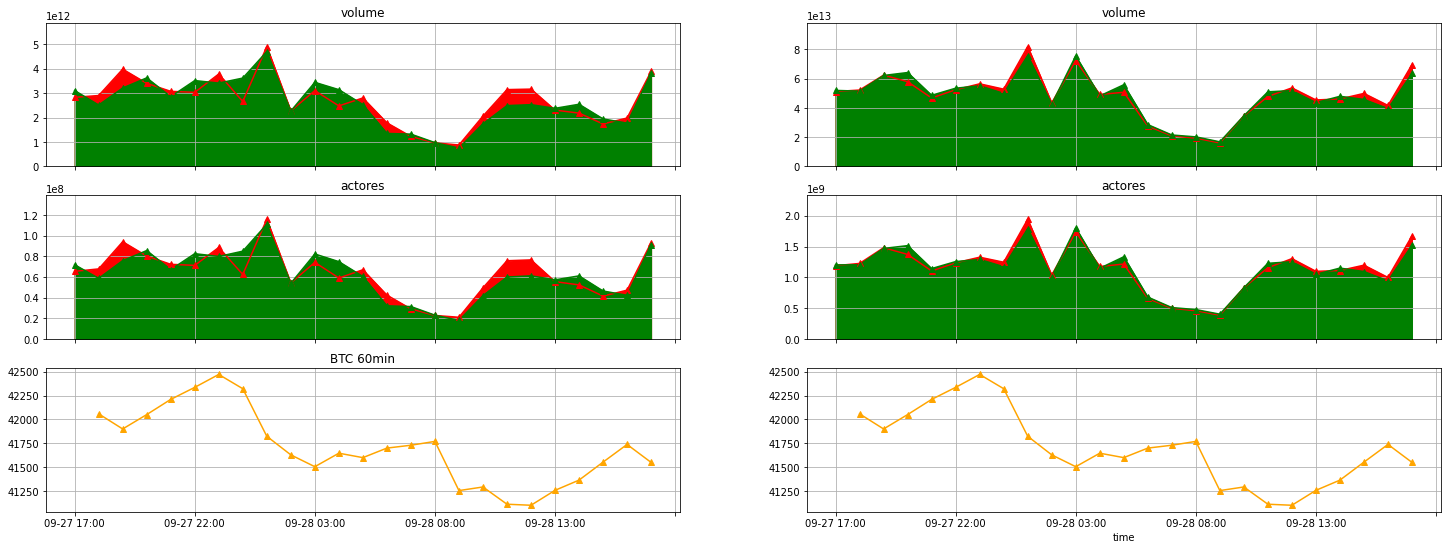

In [322]:
fig, ax = plt.subplots(3, 2, figsize=(25, 9), sharex=True)

### column V
dw['volb_10'].plot(color='red', ax=ax[0, 0], kind='area')
dw['vola_10'].plot(color='green', ax=ax[0, 0], kind='area', title='volume')
dw['volb_10'].plot(style="^", color='red', ax=ax[0, 0])
dw['vola_10'].plot(style="^", color='green', ax=ax[0, 0])

dw['volb_500'].plot(color='red', ax=ax[0, 1], kind='area')
dw['vola_500'].plot(color='green', ax=ax[0, 1], kind='area', title='volume')
dw['volb_500'].plot(style="^", color='red', ax=ax[0, 1])
dw['vola_500'].plot(style="^", color='green', ax=ax[0, 1])

### column K
dw['bk_10'].plot(color='red', ax=ax[1, 0], kind='area')
dw['ak_10'].plot(color='green', ax=ax[1, 0], kind='area', title='actores')
dw['bk_10'].plot(style="^", color='red', ax=ax[1, 0])
dw['ak_10'].plot(style="^", color='green', ax=ax[1, 0])

dw['bk_500'].plot(color='red', ax=ax[1, 1], kind='area')
dw['ak_500'].plot(color='green', ax=ax[1, 1], kind='area', title='actores')
dw['bk_500'].plot(style="^", color='red', ax=ax[1, 1])
dw['ak_500'].plot(style="^", color='green', ax=ax[1, 1])

dw[0].plot(color='orange', ax=ax[2, 0])
dw[0].plot(style="^", color='orange', ax=ax[2, 0])

dw[0].plot(color='orange', ax=ax[2, 1])
dw[0].plot(style="^", color='orange', ax=ax[2, 1])

### 10 column
ax[0, 0].set_ylim(bottom=None, top=dw[['vola_10', 'volb_10']].to_numpy().max()*1.2)
ax[1, 0].set_ylim(bottom=None, top=dw[['ak_10', 'bk_10']].to_numpy().max()*1.2)

### 500 column
ax[0, 1].set_ylim(bottom=None, top=dw[['vola_500', 'volb_500']].to_numpy().max()*1.2)
ax[1, 1].set_ylim(bottom=None, top=dw[['ak_500', 'bk_500']].to_numpy().max()*1.2)

plt.xlabel("time")
ax[2, 0].set_title(f'{elec} {n}min')

ax[0, 0].grid()
ax[1, 0].grid()
ax[2, 0].grid()
ax[0, 1].grid()
ax[1, 1].grid()
ax[2, 1].grid()
plt.show()

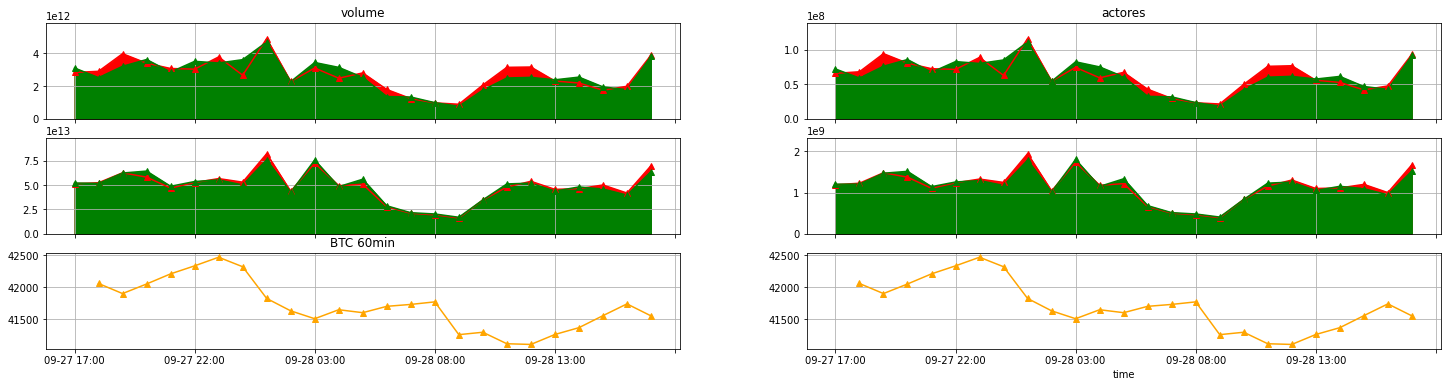

In [323]:
fig, ax = plt.subplots(3, 2, figsize=(25, 6), sharex=True)

dw[0].plot(color='orange', ax=ax[2, 0])
dw[0].plot(style="^", color='orange', ax=ax[2, 0])

### column V
dw['volb_10'].plot(color='red', ax=ax[0, 0], kind='area')
dw['vola_10'].plot(color='green', ax=ax[0, 0], kind='area', title='volume')
dw['volb_10'].plot(style="^", color='red', ax=ax[0, 0])
dw['vola_10'].plot(style="^", color='green', ax=ax[0, 0])

dw['volb_500'].plot(color='red', ax=ax[1, 0], kind='area')
dw['vola_500'].plot(color='green', ax=ax[1, 0], kind='area')
dw['volb_500'].plot(style="^", color='red', ax=ax[1, 0])
dw['vola_500'].plot(style="^", color='green', ax=ax[1, 0])

dw[0].plot(color='orange', ax=ax[2, 1])
dw[0].plot(style="^", color='orange', ax=ax[2, 1])

### column K
dw['bk_10'].plot(color='red', ax=ax[0, 1], kind='area')
dw['ak_10'].plot(color='green', ax=ax[0, 1], kind='area', title='actores')
dw['bk_10'].plot(style="^", color='red', ax=ax[0, 1])
dw['ak_10'].plot(style="^", color='green', ax=ax[0, 1])

dw['bk_500'].plot(color='red', ax=ax[1, 1], kind='area')
dw['ak_500'].plot(color='green', ax=ax[1, 1], kind='area')
dw['bk_500'].plot(style="^", color='red', ax=ax[1, 1])
dw['ak_500'].plot(style="^", color='green', ax=ax[1, 1])

# 10 column
ax[0, 0].set_ylim(bottom=None, top=dw[['vola_10', 'volb_10']].to_numpy().max()*1.2)
ax[0, 1].set_ylim(bottom=None, top=dw[['ak_10', 'bk_10']].to_numpy().max()*1.2)

# 500 column
ax[1, 0].set_ylim(bottom=None, top=dw[['vola_500', 'volb_500']].to_numpy().max()*1.2)
ax[1, 1].set_ylim(bottom=None, top=dw[['ak_500', 'bk_500']].to_numpy().max()*1.2)

plt.xlabel("time")
ax[2, 0].set_title(f'{elec} {n}min')

ax[0, 0].grid()
ax[1, 0].grid()
ax[2, 0].grid()
ax[0, 1].grid()
ax[1, 1].grid()
ax[2, 1].grid()
plt.show()

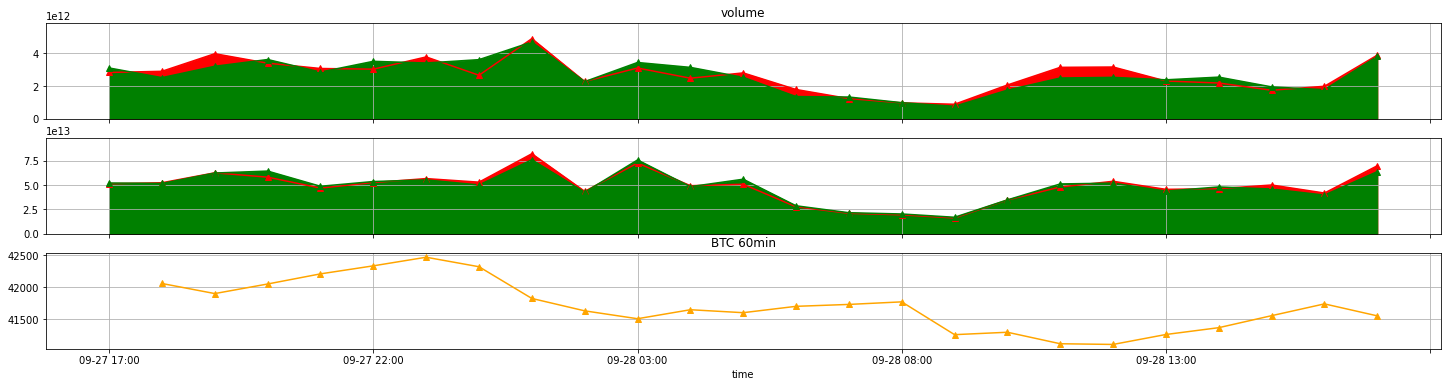

In [337]:
fig, ax = plt.subplots(3, 1, figsize=(25, 6), sharex=True)

dw[0].plot(color='orange', ax=ax[2])
dw[0].plot(style="^", color='orange', ax=ax[2])

### column V
dw['volb_10'].plot(color='red', ax=ax[0], kind='area')
dw['vola_10'].plot(color='green', ax=ax[0], kind='area', title='volume')
dw['volb_10'].plot(style="^", color='red', ax=ax[0])
dw['vola_10'].plot(style="^", color='green', ax=ax[0])

dw['volb_500'].plot(color='red', ax=ax[1], kind='area')
dw['vola_500'].plot(color='green', ax=ax[1], kind='area')
dw['volb_500'].plot(style="^", color='red', ax=ax[1])
dw['vola_500'].plot(style="^", color='green', ax=ax[1])

# dw[0].plot(color='orange', ax=ax[2, 1])
# dw[0].plot(style="^", color='orange', ax=ax[2, 1])

### column K
# dw['bk_10'].plot(color='red', ax=ax[0, 1], kind='area')
# dw['ak_10'].plot(color='green', ax=ax[0, 1], kind='area', title='actores')
# dw['bk_10'].plot(style="^", color='red', ax=ax[0, 1])
# dw['ak_10'].plot(style="^", color='green', ax=ax[0, 1])

# dw['bk_500'].plot(color='red', ax=ax[1, 1], kind='area')
# dw['ak_500'].plot(color='green', ax=ax[1, 1], kind='area')
# dw['bk_500'].plot(style="^", color='red', ax=ax[1, 1])
# dw['ak_500'].plot(style="^", color='green', ax=ax[1, 1])

# 10 column
ax[0].set_ylim(bottom=None, top=dw[['vola_10', 'volb_10']].to_numpy().max()*1.2)
# ax[0, 1].set_ylim(bottom=None, top=dw[['ak_10', 'bk_10']].to_numpy().max()*1.2)

# 500 column
ax[1].set_ylim(bottom=None, top=dw[['vola_500', 'volb_500']].to_numpy().max()*1.2)
# ax[1, 1].set_ylim(bottom=None, top=dw[['ak_500', 'bk_500']].to_numpy().max()*1.2)

plt.xlabel("time")
ax[2].set_title(f'{elec} {n}min')

ax[0].grid()
ax[1].grid()
ax[2].grid()
# ax[0, 1].grid()
# ax[1, 1].grid()
# ax[2, 1].grid()
plt.show()

In [250]:
dw

,0,volb_10,vola_10,bk_10,ak_10,volb_500,vola_500,bk_500,ak_500
09-27 23:30,42563.00,7.881125e+11,9.004179e+11,18470364.0,21104067.0,1.291698e+13,1.199991e+13,303262898.0,280724645.0
09-27 23:45,42551.89,9.869355e+11,6.321413e+11,23138449.0,14819843.0,1.194914e+13,1.229144e+13,280635918.0,287645744.0
09-28 00:00,42322.83,6.038195e+11,1.012812e+12,14185626.0,23800804.0,1.288735e+13,1.194886e+13,303494965.0,280270086.0
09-28 00:15,42353.39,5.701855e+11,9.326622e+11,13408518.0,21930081.0,1.441665e+13,1.256563e+13,339774017.0,294807394.0
09-28 00:30,42384.68,6.858246e+11,8.437092e+11,16145375.0,19864960.0,1.259250e+13,1.231594e+13,296988587.0,289358081.0
09-28 00:45,42351.00,7.969064e+11,8.247895e+11,18779466.0,19432682.0,1.297247e+13,1.314375e+13,306224600.0,308975897.0
09-28 01:00,42276.26,1.095149e+12,1.293357e+12,25800204.0,30479655.0,1.961390e+13,2.047772e+13,463172821.0,481047752.0
09-28 01:15,42262.48,1.663272e+12,1.206166e+12,39296996.0,28498462.0,2.236484e+13,1.955456e+13,529346990.0,461166106.0
09-28 01:30,42100.00,1.132006e+12,1.340192e+12,26747993.0,31673134.0,2.019334e+13,1.899018e+13,478167121.0,447971078.0
09-28 01:45,41824.00,1.012897e+12,8.571700e+11,24080060.0,20373436.0,1.984084e+13,1.681306e+13,472676872.0,398786268.0


In [300]:
t_vol_10 = dw['volb_10']+dw['vola_10']
dw['rb_10'] = dw['volb_10']/t_vol_10
dw['ra_10'] = dw['vola_10']/t_vol_10

In [301]:
t_vol_500 = dw['volb_500']+dw['vola_500']
dw['rb_500'] = dw['volb_500']/t_vol_500
dw['ra_500'] = dw['vola_500']/t_vol_500

In [302]:
dw

,0,volb_10,vola_10,bk_10,ak_10,volb_500,vola_500,bk_500,ak_500,rb_10,ra_10,rb_500,ra_500
09-27 17:01,NaN,2.786593e+10,6.343097e+10,647600.0,1474267.0,7.889806e+11,7.915255e+11,18373225.0,18358988.0,0.305223,0.694777,0.499195,0.500805
09-27 17:02,42990.20,8.465571e+10,4.403372e+10,1966862.0,1023276.0,1.490613e+12,1.378711e+12,34706130.0,31973323.0,0.657830,0.342170,0.519500,0.480500
09-27 17:03,43003.83,1.445009e+11,3.340802e+10,3355846.0,775896.0,1.397679e+12,1.365889e+12,32515563.0,31662665.0,0.812218,0.187782,0.505752,0.494248
09-27 17:04,43024.96,9.269430e+10,5.912924e+10,2151336.0,1372253.0,1.250967e+12,1.333885e+12,29080448.0,30901457.0,0.610540,0.389460,0.483961,0.516039
09-27 17:05,42991.66,7.445675e+10,9.052368e+10,1729105.0,2101677.0,1.344778e+12,1.311997e+12,31282293.0,30412797.0,0.451307,0.548693,0.506169,0.493831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
09-28 18:11,41635.86,6.697657e+10,4.629805e+10,1607739.0,1111255.0,8.593246e+11,7.827871e+11,20662235.0,18757001.0,0.591276,0.408724,0.523305,0.476695
09-28 18:12,41641.32,6.550517e+10,3.344590e+10,1572524.0,802892.0,9.701703e+11,8.187100e+11,23329406.0,19620297.0,0.661996,0.338004,0.542334,0.457666
09-28 18:13,41561.21,2.778315e+10,6.716010e+10,667632.0,1613771.0,9.532708e+11,8.024950e+11,22950365.0,19249015.0,0.292629,0.707371,0.542937,0.457063
09-28 18:14,41499.05,8.949810e+10,1.769193e+10,2152440.0,425555.0,1.080205e+12,7.764032e+11,26039515.0,18637235.0,0.834948,0.165052,0.581816,0.418184


<AxesSubplot:>

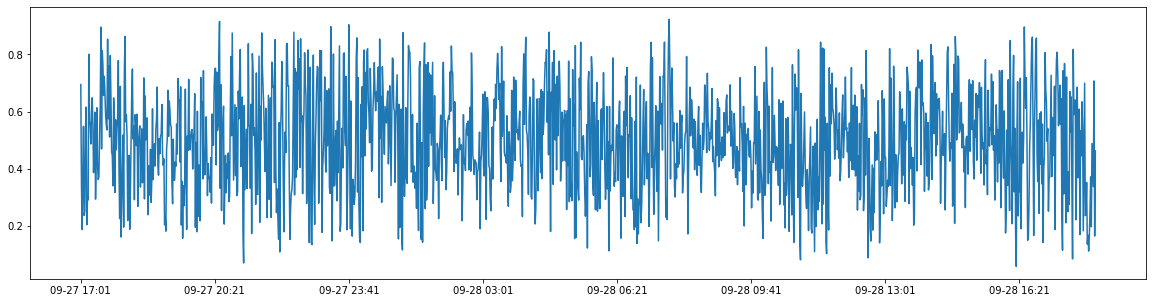

In [305]:
plt.figure(figsize=(20, 5))
dw['ra_10'].plot()